#Automatically import data sets (no google drive attached)

In [ ]:
def import_data():
  !pip install -q kaggle
  import json
  token ={"username":"xujianhong","key":"bae9a51334d9bbe694b282e9d3f556bd"} # only need to modify your token, use mine is also okay, It's not linked to a Google account
  with open('/content/kaggle.json','w') as file:
    json.dump(token,file)
  !mkdir -p ~/.kaggle
  !cp kaggle.json ~/.kaggle/
  !chmod 600 ~/.kaggle/kaggle.json
  # !kaggle datasets list -s COVID-19
  !kaggle datasets download -d meirnizri/covid19-dataset
  !unzip covid19-dataset.zip

In [ ]:
import os
file_path = '/content/Covid Data.csv'
if(os.path.isfile(file_path)):
  print('File already exists')
else:
  import_data()


Dataset URL: https://www.kaggle.com/datasets/meirnizri/covid19-dataset
License(s): CC0-1.0
 86% 4.00M/4.66M [00:01<00:00, 5.05MB/s]
100% 4.66M/4.66M [00:01<00:00, 4.17MB/s]
Archive:  covid19-dataset.zip
  inflating: Covid Data.csv          


#Load COVID-19 Datasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# use it we do not need to code plt.show()
import seaborn as sns

from sklearn.preprocessing import RobustScaler, MinMaxScaler,StandardScaler

from sklearn.model_selection import train_test_split

from imblearn.under_sampling import RandomUnderSampler

# LogisticRegression
from sklearn.linear_model import LogisticRegression
# Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# Neural Network - Start
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
# Neural Network - end

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Covid Data.csv')
print(f"shape: {df.shape}")
df.head()

shape: (1048575, 21)


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


#Preliminary data observation

explaination of dataset
- sex: female or male
- age: of the patient.
- classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
- degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
- patient type: hospitalized or not hospitalized.
- pneumonia: whether the patient already have air sacs inflammation or not.
- pregnancy: whether the patient is pregnant or not.
- diabetes: whether the patient has diabetes or not.
- copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
- asthma: whether the patient has asthma or not.
- inmsupr: whether the patient is immunosuppressed or not.
- hypertension: whether the patient has hypertension or not.
- cardiovascular: whether the patient has heart or blood vessels related disease.
- renal chronic: whether the patient has chronic renal disease or not.
other disease: whether the patient has other disease or not.
- obesity: whether the patient is obese or not.
- tobacco: whether the patient is a tobacco user.
- usmr: Indicates whether the patient treated medical units of the first, second or third level.
- medical unit: type of institution of the National Health System that provided the care.
- intubed: whether the patient was connected to the ventilator.
- icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
- death: indicates whether the patient died or recovered.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [ ]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [ ]:
for i in df.columns:
  print(f"{i} => \t {len(df[i].unique())}")

USMER => 	 2
MEDICAL_UNIT => 	 13
SEX => 	 2
PATIENT_TYPE => 	 2
DATE_DIED => 	 401
INTUBED => 	 4
PNEUMONIA => 	 3
AGE => 	 121
PREGNANT => 	 4
DIABETES => 	 3
COPD => 	 3
ASTHMA => 	 3
INMSUPR => 	 3
HIPERTENSION => 	 3
OTHER_DISEASE => 	 3
CARDIOVASCULAR => 	 3
OBESITY => 	 3
RENAL_CHRONIC => 	 3
TOBACCO => 	 3
CLASIFFICATION_FINAL => 	 7
ICU => 	 4


In [ ]:
df['DATE_DIED'].value_counts()

DATE_DIED
9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: count, Length: 401, dtype: int64

In [ ]:
df['PNEUMONIA'].value_counts()

PNEUMONIA
2     892534
1     140038
99     16003
Name: count, dtype: int64

1. We have some features that we expect them to have just 2 unique values but we see that these features have 3 or 4 unique values. For example the feature "PNEUMONIA" has 3 unique values (1,2,99) 99 represents NaN values. Hence we will just take the rows that includes 1 and 2 values.
2.In "DATE_DIED" column, we have 971633 "9999-99-99" values which represent alive patients so i will take this feature as a "DEATH" that includes wether the patient died or not.

#Data Preprocessing

In [ ]:
df = df[df['PNEUMONIA'].isin([1,2])]
df =df[df['DIABETES'].isin([1,2])]
df =df[df['COPD'].isin([1,2])]
df =df[df['ASTHMA'].isin([1,2])]
df =df[df['INMSUPR'].isin([1,2])]
df =df[df['HIPERTENSION'].isin([1,2])]
df =df[df['OTHER_DISEASE'].isin([1,2])]
df =df[df['CARDIOVASCULAR'].isin([1,2])]
df =df[df['OBESITY'].isin([1,2])]
df =df[df['RENAL_CHRONIC'].isin([1,2])]
df =df[df['TOBACCO'].isin([1,2])]

remove the missing value (except 1,2) of the above festures. For example, the PNEUMONIA only have 1 or 2 after run the above code

In [ ]:
df['PNEUMONIA'].value_counts()

PNEUMONIA
2    887553
1    137599
Name: count, dtype: int64

##preprocessing DATE_DIED feature
- new a  column called DEATH, if DATA_DIED is clearly date, the DEATH will be valued 1, such as 06/07/2020 = > 1. on the contrary, 9999-99-99 => 2

In [ ]:
df['DEATH'] = df['DATE_DIED'].apply(lambda x: 1 if x != '9999-99-99' else 0) #if it is clearly date willbe   1:died, 0:non-died

In [ ]:
df['DEATH'].value_counts()

DEATH
0    950438
1     74714
Name: count, dtype: int64

##Preprocessing PREGNANT

In [ ]:
df.PREGNANT.value_counts()

PREGNANT
97    511936
2     502200
1       7841
98      3175
Name: count, dtype: int64

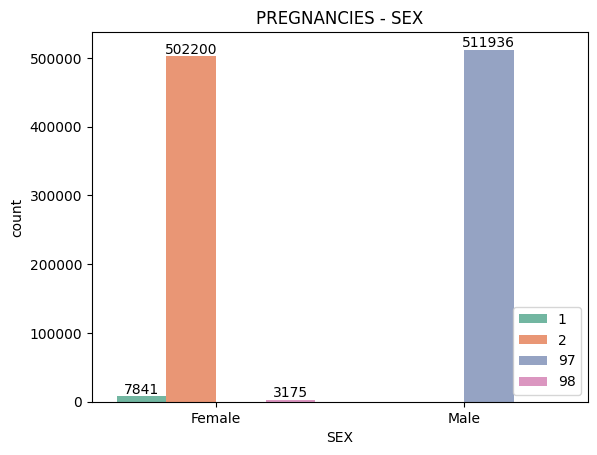

In [ ]:
plt.figure()
ax = sns.countplot(data = df, x =df['SEX'],hue=df['PREGNANT'],palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks([0,1],['Female','Male'])
plt.legend(loc='lower right')
plt.title('PREGNANCIES - SEX');

We see that all "97" values are for males and males can not be pregnant so we will convert 97 to 2.

In [ ]:
df['PREGNANT'] = df['PREGNANT'].replace(97,2)

df= df[df['PREGNANT'].isin([1,2])]

In [ ]:
df.PREGNANT.value_counts()

PREGNANT
2    1014136
1       7841
Name: count, dtype: int64

## Preprocessing INTUBED and ICU

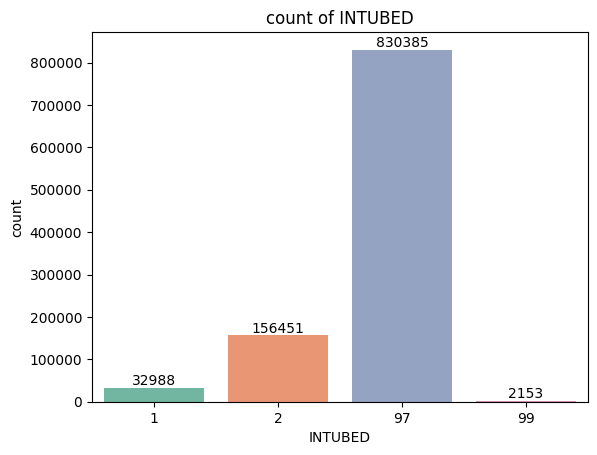

In [ ]:
ax = sns.countplot(data = df, x = df.INTUBED,palette='Set2')
for bar in ax.containers:
  ax.bar_label(bar)
plt.title('count of INTUBED');

Except for 1 and 2, there are so many missing values of INTUBED, 97 and 99 belong to the error type

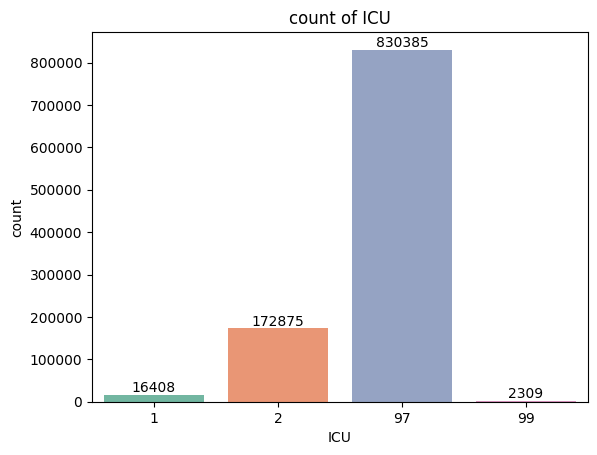

In [ ]:
ax = sns.countplot(data = df ,x = df.ICU,palette='Set2')
for bar in ax.containers:
  ax.bar_label(bar)
plt.title('count of ICU');

Similarly, ICU has so many missing values, so that we can remove the attributes

In [ ]:
df.drop(columns = ['DATE_DIED','INTUBED','ICU'],inplace=True)

21-3=18

In [ ]:
for i in df.columns:
  print(f"{i} => \t {len(df[i].unique())}")

USMER => 	 2
MEDICAL_UNIT => 	 13
SEX => 	 2
PATIENT_TYPE => 	 2
PNEUMONIA => 	 2
AGE => 	 121
PREGNANT => 	 2
DIABETES => 	 2
COPD => 	 2
ASTHMA => 	 2
INMSUPR => 	 2
HIPERTENSION => 	 2
OTHER_DISEASE => 	 2
CARDIOVASCULAR => 	 2
OBESITY => 	 2
RENAL_CHRONIC => 	 2
TOBACCO => 	 2
CLASIFFICATION_FINAL => 	 7
DEATH => 	 2


As we see, we have just one numeric feature which is called "AGE" the rest of them are categorical.


# Data visualization

Text(0.5, 1.0, 'DEATH distribution')

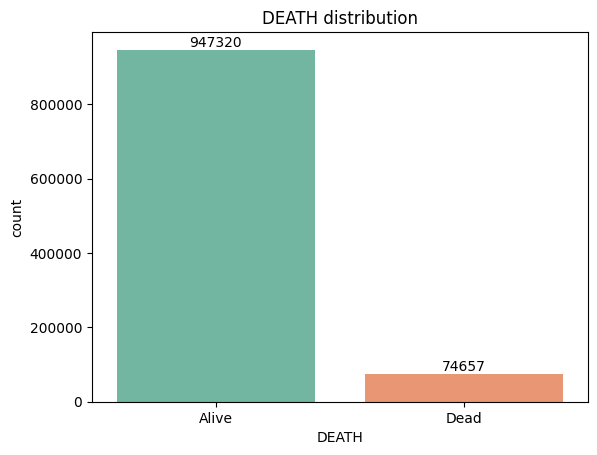

In [ ]:
ax = sns.countplot(data= df, x= df.DEATH, palette='Set2')
for bar in ax.containers:
  ax.bar_label(bar)
plt.xticks([0,1],['Alive','Dead'])
plt.title('DEATH distribution')

As we see, the values unbalanced in target column, it will cause an imbalance question

Text(0.5, 1.0, 'AGE distribution')

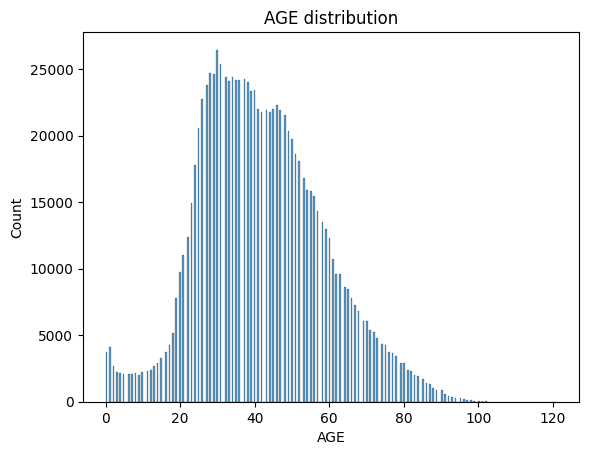

In [ ]:
sns.histplot(data= df, x = df.AGE)
plt.title('AGE distribution')

Patients are roughly between 20-60 years old.

Text(0.5, 1.0, 'DEATH-AGE distribution')

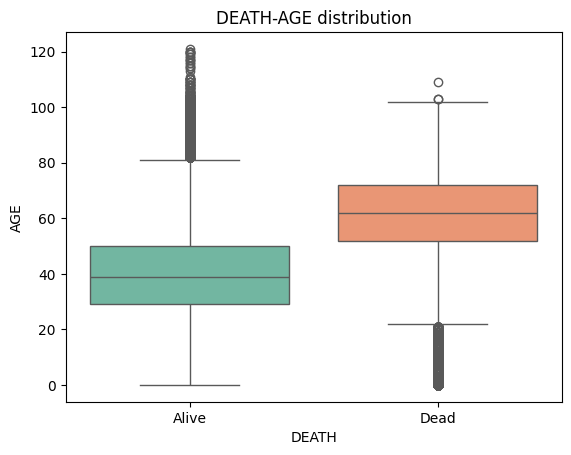

In [ ]:
sns.boxplot(data= df, x = df.DEATH, y = df.AGE,palette='Set2')
plt.xticks([0,1],['Alive','Dead'])
plt.title('DEATH-AGE distribution')

The older patients are more likely to die compare to younger ones.

Text(0.5, 1.0, 'PREGNANT-DEATH-SEX distribution')

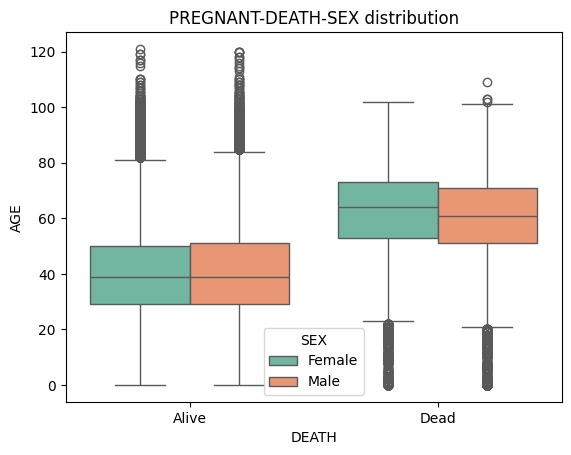

In [ ]:
sex = df.SEX
sex = sex.replace({1:'Female',2:'Male'})
sns.boxplot(data= df, x = df.DEATH, y = df.AGE, hue=sex,palette='Set2')
plt.xticks([0,1],['Alive','Dead'])
plt.title('PREGNANT-DEATH-SEX distribution')

sex distribution is not big

Text(0.5, 1.0, 'DEATH-SEX distribution')

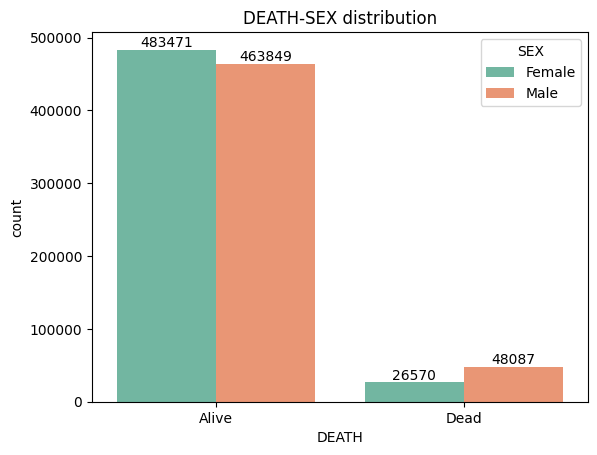

In [ ]:
sex = df.SEX
sex = sex.replace({1:'Female',2:'Male'})
ax =sns.countplot(data= df, x = df.DEATH, hue=sex,palette='Set2')
for bar in ax.containers:
  ax.bar_label(bar)
plt.xticks([0,1],['Alive','Dead'])
plt.title('DEATH-SEX distribution')

Males are more likely to die of covid compare to females.

Text(0.5, 1.0, 'OBESITY-DEATH distribution')

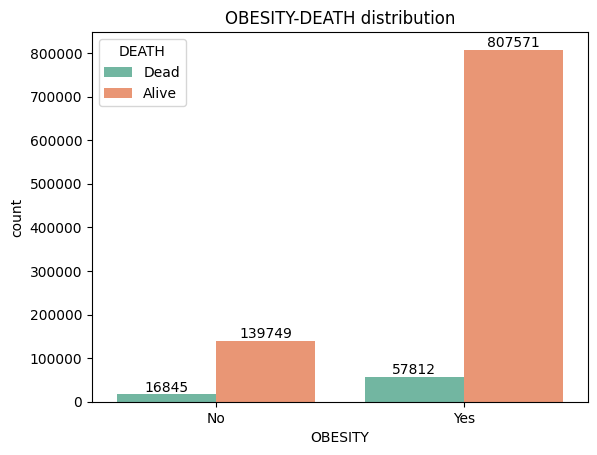

In [ ]:
death = df.DEATH
death = death.replace({0:'Alive',1:'Dead'})
ax =sns.countplot(data= df, x = df.OBESITY, hue=death,palette='Set2')
for bar in ax.containers:
  ax.bar_label(bar)
plt.xticks([0,1],['No','Yes'])
plt.title('OBESITY-DEATH distribution')

Obesity patients are more likely to die from COVID compare to non-obese patients

#Correlation heat map

Text(0.5, 1.0, 'Correlation between features')

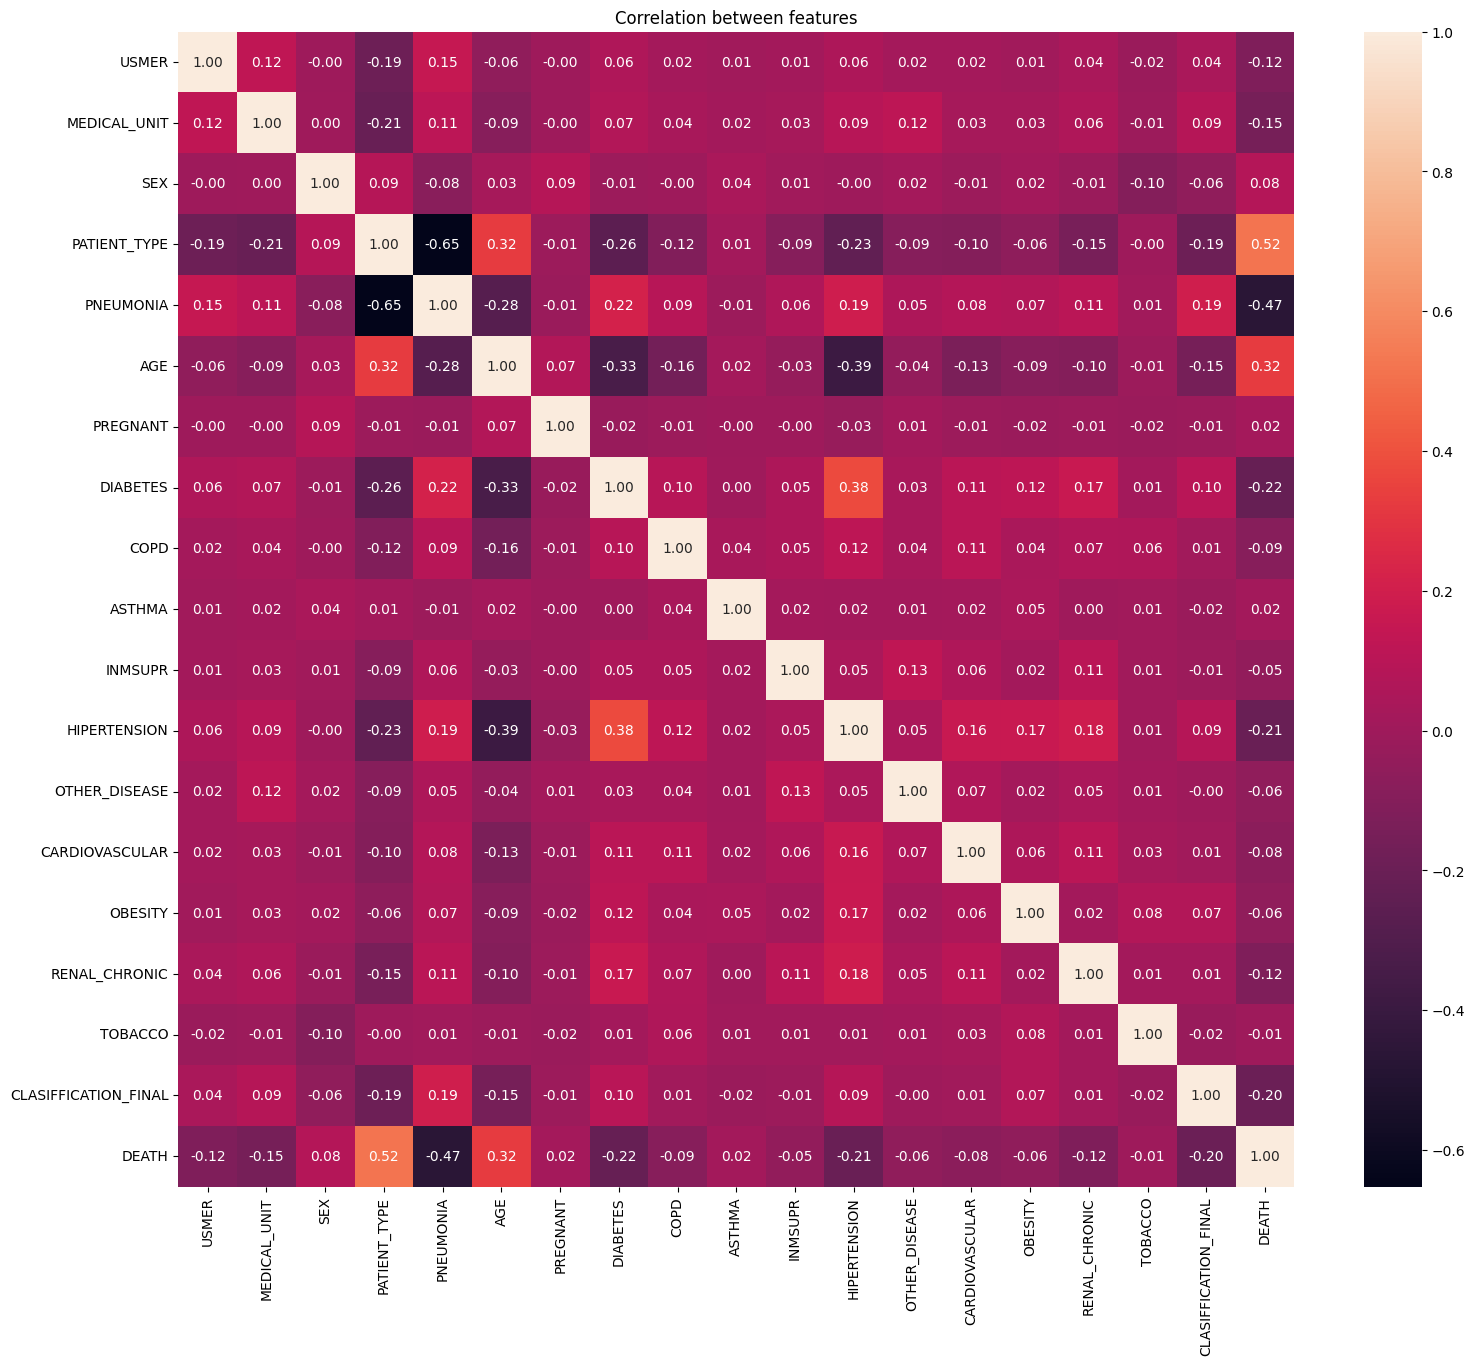

In [ ]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=True,fmt='0.2f')
plt.title('Correlation between features')

Based on the heat map, we can drop the features that are a low relation with 'DEATH'

In [ ]:
unrelevant_columns= ['SEX','PREGNANT','COPD','ASTHMA','INMSUPR','OTHER_DISEASE','CARDIOVASCULAR','OBESITY','TOBACCO']

df.drop(columns=unrelevant_columns,inplace=True)

# Data Visualiztion after remove the low relation values

In [ ]:
df.shape

(1021977, 10)

In [ ]:
df.describe()

,USMER,MEDICAL_UNIT,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL,DEATH
count,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06
mean,1.642009e+00,8.987361e+00,1.187472e+00,1.865591e+00,4.189535e+01,1.880455e+00,1.844163e+00,1.982074e+00,5.291434e+00,7.305155e-02
std,4.794098e-01,3.724244e+00,3.902901e-01,3.410915e-01,1.674953e+01,3.244286e-01,3.627011e-01,1.326828e-01,1.889546e+00,2.602212e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
50%,2.000000e+00,1.200000e+01,1.000000e+00,2.000000e+00,4.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,0.000000e+00
75%,2.000000e+00,1.200000e+01,1.000000e+00,2.000000e+00,5.300000e+01,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,0.000000e+00
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,1.210000e+02,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,1.000000e+00


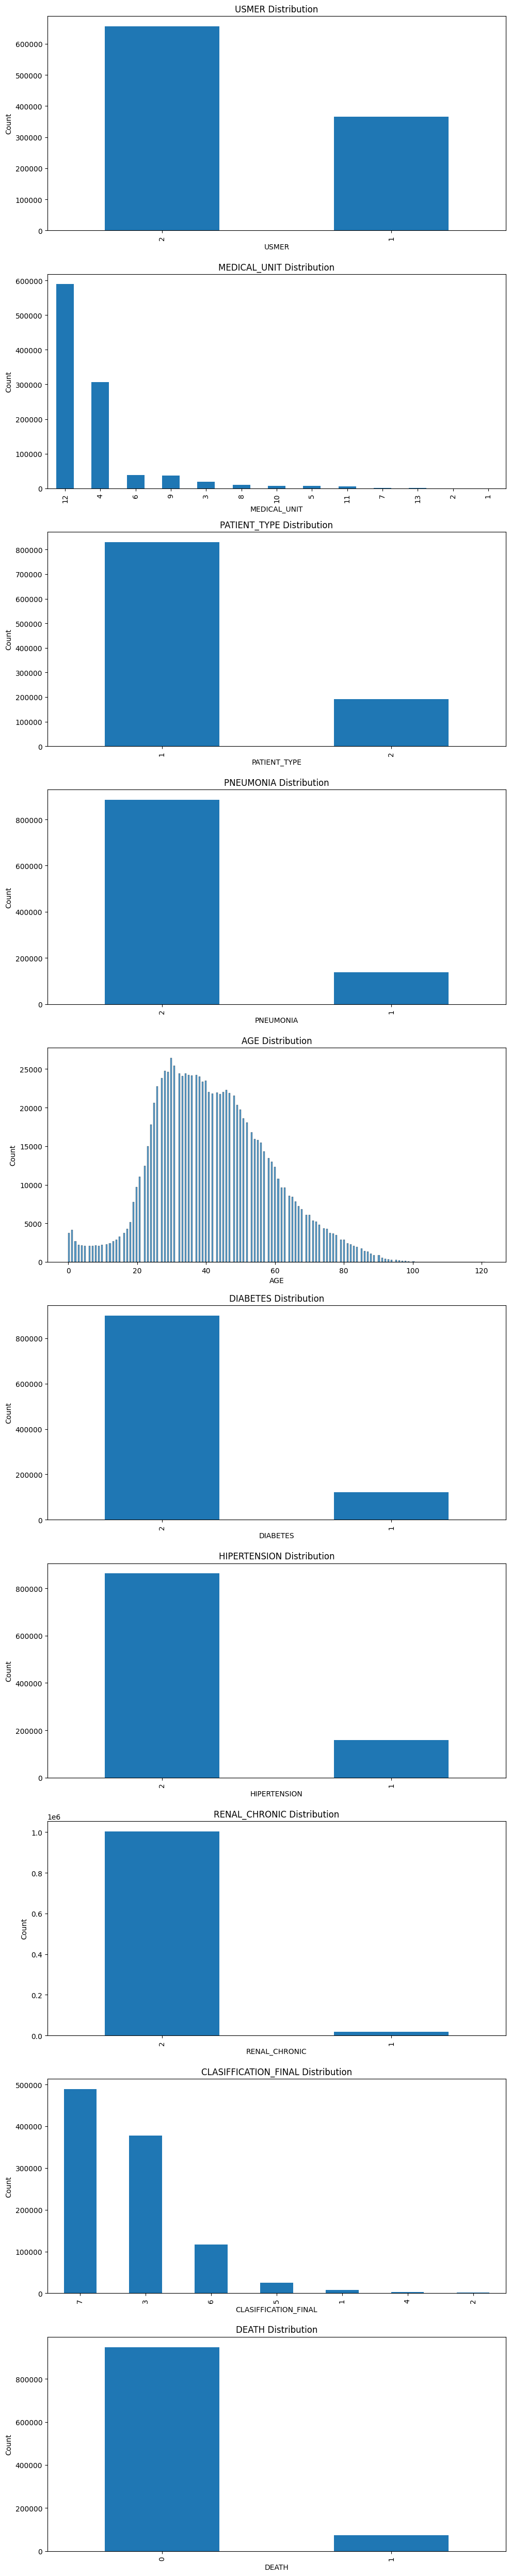

In [ ]:
fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(10, 50))

for i, col in enumerate(df.columns):
    if(col != 'AGE'):
      value_counts = df[col].value_counts()
      value_counts.plot(kind='bar', ax=axes[i])
      axes[i].set_title(f'{col} Distribution')
      axes[i].set_xlabel(col)
      axes[i].set_ylabel('Count')
    else:
      sns.histplot(data= df, x = df.AGE, ax=axes[i])
      axes[i].set_title(f'{col} Distribution')
      axes[i].set_xlabel(col)
      axes[i].set_ylabel('Count')


plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'USMER'}>,
        <Axes: title={'center': 'MEDICAL_UNIT'}>,
        <Axes: title={'center': 'PATIENT_TYPE'}>],
       [<Axes: title={'center': 'PNEUMONIA'}>,
        <Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'DIABETES'}>],
       [<Axes: title={'center': 'HIPERTENSION'}>,
        <Axes: title={'center': 'RENAL_CHRONIC'}>,
        <Axes: title={'center': 'CLASIFFICATION_FINAL'}>],
       [<Axes: title={'center': 'DEATH'}>, <Axes: >, <Axes: >]],
      dtype=object)

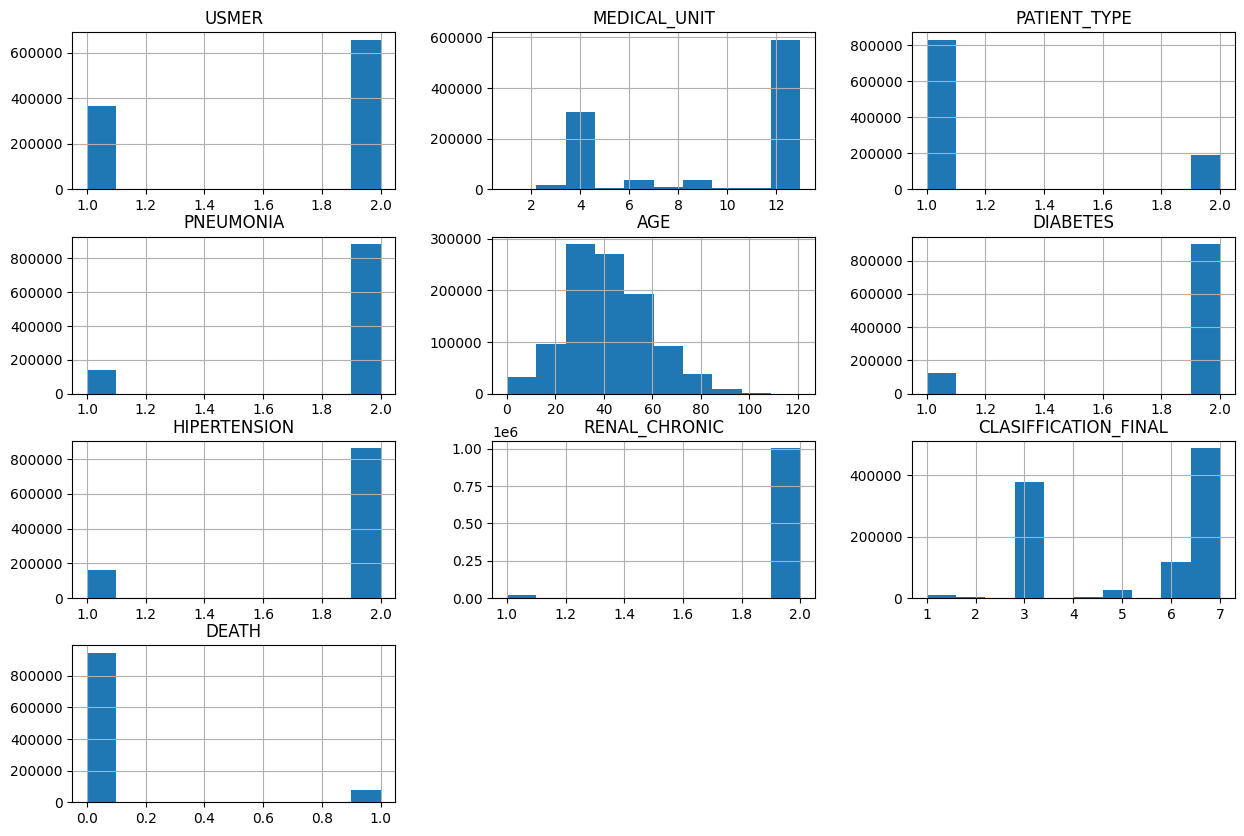

In [ ]:
df.hist(figsize=(15,10))

#convert categorical data into a numerical format (one-hot encoded variables, look like LabelBinarizer)

In [ ]:
df = pd.get_dummies(df,columns = ['MEDICAL_UNIT','CLASIFFICATION_FINAL'],drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1021977 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                  Non-Null Count    Dtype
---  ------                  --------------    -----
 0   USMER                   1021977 non-null  int64
 1   PATIENT_TYPE            1021977 non-null  int64
 2   PNEUMONIA               1021977 non-null  int64
 3   AGE                     1021977 non-null  int64
 4   DIABETES                1021977 non-null  int64
 5   HIPERTENSION            1021977 non-null  int64
 6   RENAL_CHRONIC           1021977 non-null  int64
 7   DEATH                   1021977 non-null  int64
 8   MEDICAL_UNIT_2          1021977 non-null  bool 
 9   MEDICAL_UNIT_3          1021977 non-null  bool 
 10  MEDICAL_UNIT_4          1021977 non-null  bool 
 11  MEDICAL_UNIT_5          1021977 non-null  bool 
 12  MEDICAL_UNIT_6          1021977 non-null  bool 
 13  MEDICAL_UNIT_7          1021977 non-null  bool 
 14  MEDICAL_UNIT_8          1021977 non-nul

# scaling the numeric feature

In [ ]:
scaler = RobustScaler()
df.AGE = scaler.fit_transform(df.AGE.values.reshape(-1,1))

# Determining the 'x' and 'y'


In [ ]:
x = df.drop(columns='DEATH')
y = df['DEATH'] # label feature

# Train Test Split

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2,random_state=42)
print(f'Train_x shape: {train_x.shape}')
print(f'Train_y shape: {train_y.shape}')
print(f'Test_x shape: {test_x.shape}')
print(f'Test_y shape: {test_y.shape}')

Train_x shape: (817581, 25)
Train_y shape: (817581,)
Test_x shape: (204396, 25)
Test_y shape: (204396,)


Split 80% train set and 20% test set

#Logistic Regression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(train_x,train_y)


LogisticRegression()

In [ ]:
some_data = train_x.iloc[:10]
some_labels = train_y.iloc[:10]
print("Predictions:", log_reg.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [0 0 0 0 0 0 0 0 0 0]
Labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
print(f'Logistic Regression Test Accuracy Score: {accuracy_score(test_y,log_reg.predict(test_x))*100}')

Logistic Regression Test Accuracy Score: 93.9362805534355


In [ ]:
print(classification_report(test_y,log_reg.predict(test_x),target_names=['Alive','Dead']))

              precision    recall  f1-score   support

       Alive       0.96      0.98      0.97    189597
        Dead       0.61      0.45      0.52     14799

    accuracy                           0.94    204396
   macro avg       0.78      0.71      0.74    204396
weighted avg       0.93      0.94      0.94    204396



As we see, although the accuracy score is the high value which is 94%. it's an imbalance data, the precision value, recall and f1-score of the dead patients are a low value which are 61%, 45% and 52%.

Text(0.5, 1.0, 'Confusion Matrix')

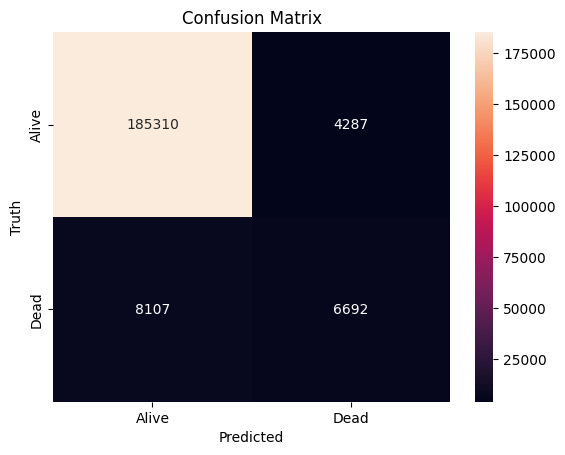

In [ ]:
sns.heatmap(confusion_matrix(test_y,log_reg.predict(test_x)),annot=True,fmt='d',
            xticklabels=['Alive', 'Dead'],
            yticklabels=['Alive', 'Dead'])
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')

## How to solve imbalance dataset


 we can do that:
 - Loading more datas
 - Changing the performance metrics
 - Resampling(Undersampling or Oversampling)
 - Changing the Algorithm
 - Penalized Models etc.

we are going to use Undersampling for this case because we already have too many patients
- Undersampling : Undersampling is a technique to balance uneven datasets by keeping all of the data in the minority class and decreasing the size of the majority class.
- If we use Oversampling our row number will increase so this is too many rows for computer.
- If we can't solve the problem with Undersampling we will use the others.

Text(0.5, 1.0, 'DEATH distribution before undersampling')

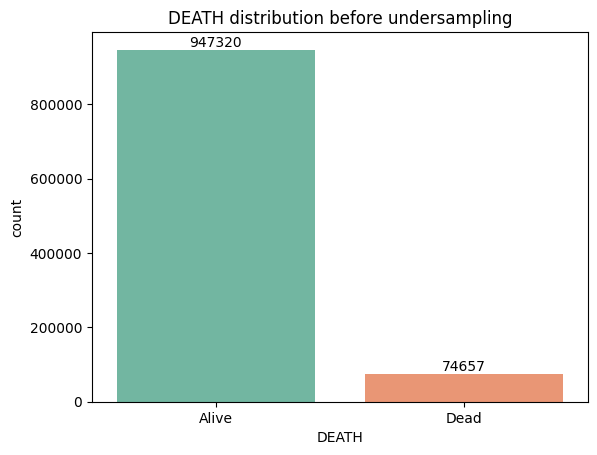

In [ ]:
ax = sns.countplot(data = df, x = df.DEATH,palette='Set2')
for bar in ax.containers:
  ax.bar_label(bar)
plt.xticks([0,1],['Alive','Dead'])
plt.title('DEATH distribution before undersampling')

In [ ]:
rus = RandomUnderSampler(random_state=42)
x_resampled, y_resampled = rus.fit_resample(x,y)

Text(0.5, 1.0, 'DEATH distribution after undersampling')

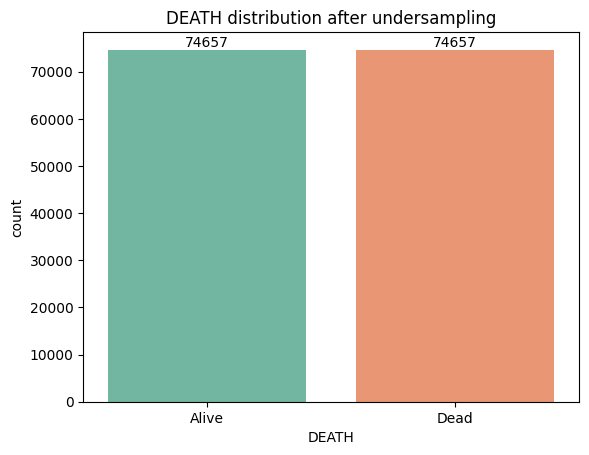

In [ ]:
ax = sns.countplot(data = df,x =y_resampled,palette='Set2')
for bar in ax.containers:
  ax.bar_label(bar)
plt.xticks([0,1],['Alive','Dead'])
plt.title('DEATH distribution after undersampling')

 undersampling reduces the number of majority class instances to balance the dataset

## Train Test Split After Undersampling


In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=42)

print(f'Train_x shape: {train_x.shape}')
print(f'Train_y shape: {train_y.shape}')
print(f'Test_x shape: {test_x.shape}')
print(f'Test_y shape: {test_y.shape}')

Train_x shape: (119451, 25)
Train_y shape: (119451,)
Test_x shape: (29863, 25)
Test_y shape: (29863,)


## Logistic Regression After Undersampling


In [ ]:
log_reg = LogisticRegression()
log_reg.fit(train_x,train_y)

LogisticRegression()

In [ ]:
some_data = train_x.iloc[:10]
some_labels = train_y.iloc[:10]
print("Predictions:", log_reg.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [1 1 0 1 1 1 0 1 1 0]
Labels: [1, 1, 0, 1, 1, 1, 0, 1, 1, 0]


In [ ]:
print(f'Logistic Regression Test Accuracy Score: {accuracy_score(test_y,log_reg.predict(test_x))*100}')

Logistic Regression Test Accuracy Score: 90.40618825971939


In [ ]:
print(classification_report(test_y,log_reg.predict(test_x), target_names=['Alive', 'Dead']))

              precision    recall  f1-score   support

       Alive       0.92      0.89      0.90     14889
        Dead       0.89      0.92      0.91     14974

    accuracy                           0.90     29863
   macro avg       0.90      0.90      0.90     29863
weighted avg       0.90      0.90      0.90     29863



Text(0.5, 1.0, 'logistic Regression Confusion Matrix')

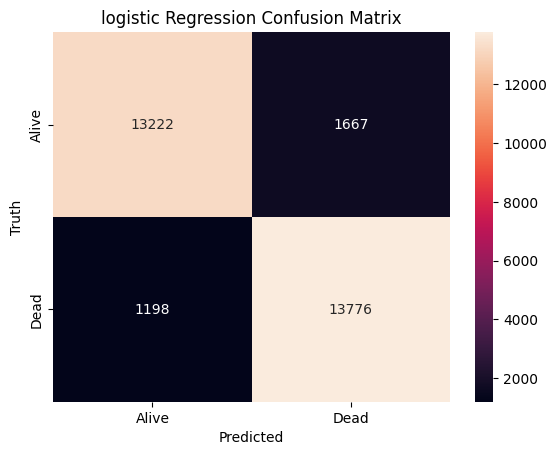

In [ ]:
sns.heatmap(confusion_matrix(test_y,log_reg.predict(test_x)),annot=True,fmt='d',
            xticklabels=['Alive', 'Dead'],
            yticklabels=['Alive', 'Dead'])
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('logistic Regression Confusion Matrix')


We solved the problem with Undersampling. We also could've used Oversampling and probably we would get better accuracy but i think it would be so tiring for computer.


## Logistic Regression Curve

Text(0.5, 1.0, 'Logistic Regressio ROC Curve')

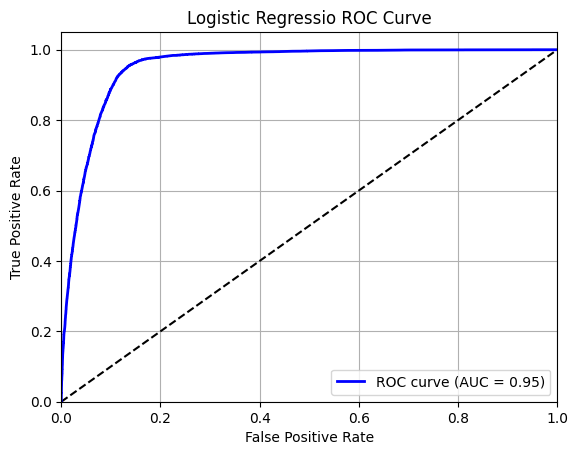

In [ ]:
# test_y = test_y.replace({2:1,1:0})

log_reg_pred_proba = log_reg.predict_proba(test_x)


fpr_lg, tpr_lg, thresholds_lg = roc_curve(test_y,log_reg_pred_proba[:,1])
roc_auc_lg = roc_auc_score(test_y, log_reg_pred_proba[:,1])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_lg,tpr_lg, color='blue', lw = 2, label = f'ROC curve (AUC = {roc_auc_lg:.2f})')
plt.legend(loc="lower right")
plt.grid(True)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regressio ROC Curve')

# Random Forest Classification


In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=42)

print(f'Train_x shape: {train_x.shape}')
print(f'Train_y shape: {train_y.shape}')
print(f'Test_x shape: {test_x.shape}')
print(f'Test_y shape: {test_y.shape}')

Train_x shape: (119451, 25)
Train_y shape: (119451,)
Test_x shape: (29863, 25)
Test_y shape: (29863,)


In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=400,random_state=42)

rf_classifier.fit(train_x, train_y)


RandomForestClassifier(n_estimators=400, random_state=42)

In [ ]:
some_data = train_x.iloc[:10]
some_labels = train_y.iloc[:10]
print("Predictions:", rf_classifier.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [1 1 0 1 1 1 0 1 1 0]
Labels: [1, 1, 0, 1, 1, 1, 0, 1, 1, 0]


In [ ]:
print(f'Random Forest Test Accuracy Score: {accuracy_score(test_y,rf_classifier.predict(test_x))*100}')

Random Forest Test Accuracy Score: 89.96082108294546


In [ ]:
print(classification_report(test_y,rf_classifier.predict(test_x),target_names=['Alive','Dead']))

              precision    recall  f1-score   support

       Alive       0.93      0.87      0.90     14889
        Dead       0.88      0.93      0.90     14974

    accuracy                           0.90     29863
   macro avg       0.90      0.90      0.90     29863
weighted avg       0.90      0.90      0.90     29863



Text(0.5, 1.0, 'Random Forest Confusion Matrix')

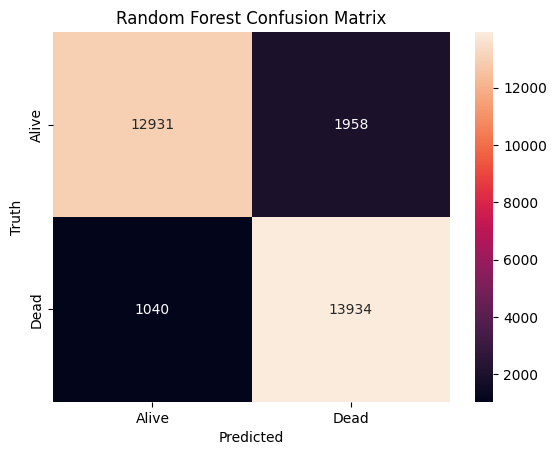

In [ ]:
sns.heatmap(confusion_matrix(test_y,rf_classifier.predict(test_x)),annot=True,fmt='d',
            xticklabels=['Alive', 'Dead'],
            yticklabels=['Alive', 'Dead'])
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Random Forest Confusion Matrix')

Text(0.5, 1.0, 'Random Forest ROC Curve')

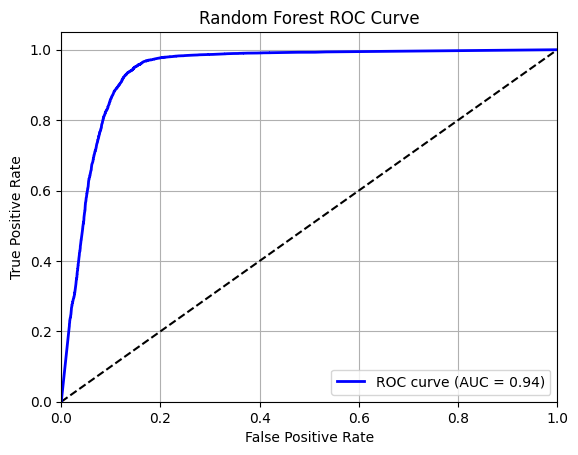

In [ ]:
# test_y = test_y.replace({2:1,1:0})

rf_classifier_pred_proba = rf_classifier.predict_proba(test_x)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(test_y,rf_classifier_pred_proba[:,1])
roc_auc_rf = roc_auc_score(test_y, rf_classifier_pred_proba[:,1])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_rf,tpr_rf, color='blue', lw = 2, label = f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.legend(loc="lower right")
plt.grid(True)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')

# Neural Network


In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=42)

print(f'Train_x shape: {train_x.shape}')
print(f'Train_y shape: {train_y.shape}')
print(f'Test_x shape: {test_x.shape}')
print(f'Test_y shape: {test_y.shape}')

Train_x shape: (119451, 25)
Train_y shape: (119451,)
Test_x shape: (29863, 25)
Test_y shape: (29863,)


In [ ]:
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

In [ ]:
nn_model = Sequential([
    Dense(64, activation="relu",input_shape=(train_x.shape[1],)),
    Dropout(0.2),
    Dense(32, activation="relu"),
    Dropout(0.2),
    Dense(1, activation="sigmoid")
])
nn_model.compile(optimizer="adam", loss="binary_crossentropy",metrics=["accuracy"])

early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=10)
history = nn_model.fit(train_x_scaled,train_y,validation_data=(test_x_scaled,test_y),epochs=50,batch_size=32,callbacks=[early_stop])



Epoch 1/50
3733/3733 [==============================] - 15s 4ms/step - loss: 0.2538 - accuracy: 0.9096 - val_loss: 0.2463 - val_accuracy: 0.9092
Epoch 2/50
3733/3733 [==============================] - 11s 3ms/step - loss: 0.2400 - accuracy: 0.9145 - val_loss: 0.2439 - val_accuracy: 0.9102
Epoch 3/50
3733/3733 [==============================] - 9s 3ms/step - loss: 0.2372 - accuracy: 0.9148 - val_loss: 0.2435 - val_accuracy: 0.9108
Epoch 4/50
3733/3733 [==============================] - 11s 3ms/step - loss: 0.2368 - accuracy: 0.9148 - val_loss: 0.2440 - val_accuracy: 0.9107
Epoch 5/50
3733/3733 [==============================] - 10s 3ms/step - loss: 0.2355 - accuracy: 0.9152 - val_loss: 0.2450 - val_accuracy: 0.9097
Epoch 6/50
3733/3733 [==============================] - 10s 3ms/step - loss: 0.2346 - accuracy: 0.9158 - val_loss: 0.2441 - val_accuracy: 0.9103
Epoch 7/50
3733/3733 [==============================] - 10s 3ms/step - loss: 0.2348 - accuracy: 0.9159 - val_loss: 0.2427 - val_acc

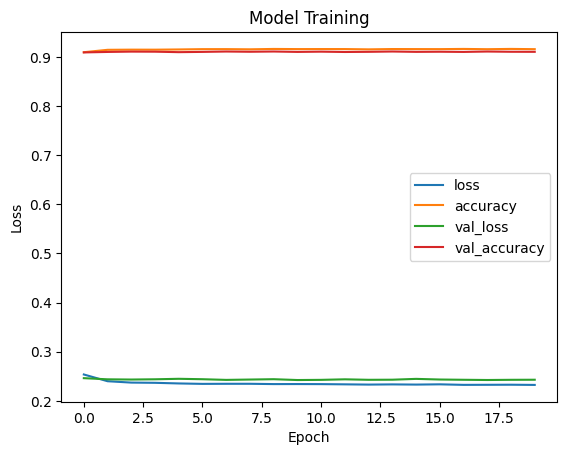

934/934 [==============================] - 2s 2ms/step - loss: 0.2431 - accuracy: 0.9104
Loss: 0.24305185675621033
Neural Network Accuracy Score: 91.03907942771912


In [ ]:
losses = pd.DataFrame(history.history)
losses.plot()
plt.title("Model Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


loss, accuracy = nn_model.evaluate(test_x_scaled,test_y)
print(f'Loss: {loss}')
print(f'Neural Network Accuracy Score: {accuracy*100}')

In [ ]:
pred_nn = nn_model.predict(test_x_scaled)
pred_classes = np.where(pred_nn > 0.5,1,0)

934/934 [==============================] - 3s 3ms/step


Text(0.5, 1.0, 'Neural Network Confusion Matrix')

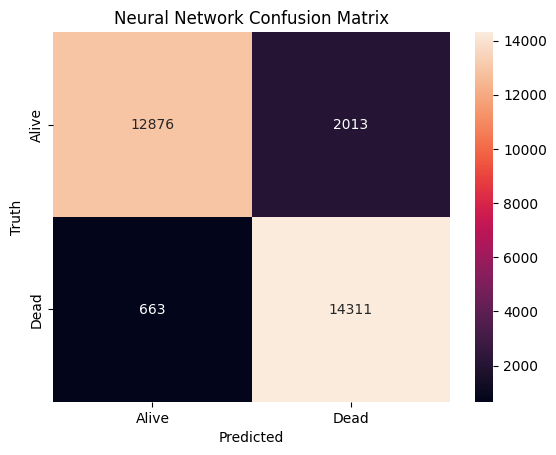

In [ ]:
sns.heatmap(confusion_matrix(test_y,pred_classes),annot=True,fmt='d',
            xticklabels=['Alive', 'Dead'],
            yticklabels=['Alive', 'Dead'])
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Neural Network Confusion Matrix')

In [ ]:
print(classification_report(test_y,pred_classes,target_names=['Alive','Dead']))

              precision    recall  f1-score   support

       Alive       0.95      0.86      0.91     14889
        Dead       0.88      0.96      0.91     14974

    accuracy                           0.91     29863
   macro avg       0.91      0.91      0.91     29863
weighted avg       0.91      0.91      0.91     29863



Text(0.5, 1.0, 'Neural Network ROC Curve')

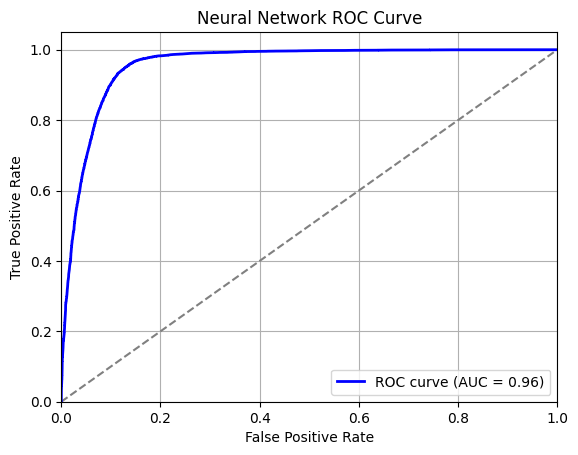

In [ ]:
fpr_nn, tpr_nn, thresholds_nn = roc_curve(test_y,pred_nn)
roc_auc_nn = roc_auc_score(test_y, pred_nn)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.plot(fpr_nn,tpr_nn,color ='blue',lw=2, label=f'ROC curve (AUC = {roc_auc_nn:.2f})')

plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Neural Network ROC Curve')

# Comparison of ROC and AUC of the three models

Text(0.5, 1.0, 'ROC Curve')

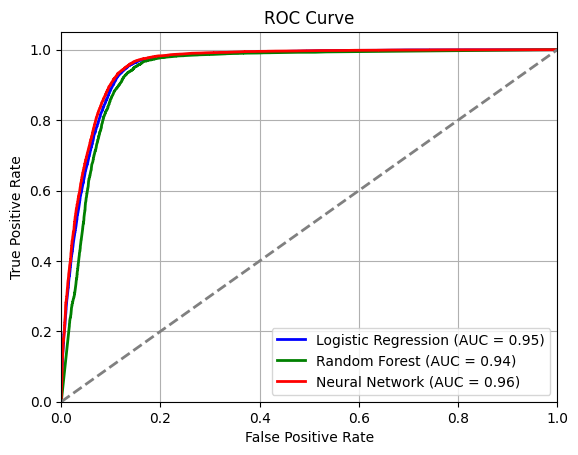

In [ ]:
plt.figure()

plt.plot(fpr_lg,tpr_lg,color ='blue',lw=2, label=f'Logistic Regression (AUC = {roc_auc_lg:.2f})')
plt.plot(fpr_rf,tpr_rf,color ='green',lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_nn,tpr_nn,color ='red',lw=2, label=f'Neural Network (AUC = {roc_auc_nn:.2f})')
plt.plot([0,1],[0,1],color='gray',lw=2,linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.title('ROC Curve')